# Heterogeneous Treatment Effect Estimation

We often estimate the **average treatement effect** of some binary treatment variable $A \in \{0, 1\}$ on some observation variable $Y$:

$$\tau = \mathbb{E}[Y | \operatorname{do}(A := 1)] - \mathbb{E}[Y | \operatorname{do}(A := 0)]$$

However, in many case, we are interested in a more granular view of the effect of treatment. For some covariates $X$ in the causal model, we can find the average treatment effect conditioned on some assignment $x$ of $X$, which is called a **heterogeneous treatement effect**:

$$\tau(x) = \mathbb{E}[Y | X = x, \operatorname{do}(A := 1)] - \mathbb{E}[Y | X = x, \operatorname{do}(A := 0)]$$

The code below shows how to use the causal forest estimator to estimate individual treatment effects for the `whynot.opioid.RCT` experiment.

In [8]:
%load_ext autoreload
%autoreload 2

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import whynot as wn

import scripts.heterogeneous_utils as utils
%matplotlib inline

## Generating data

WhyNot generates an observational dataset $(X_i, A_i, Y_i)_{i=1}^n$, as well as individual-level counterfactuals $Y_{i, \operatorname{do}(A=0)}, Y_{i, \operatorname{do}(A=1)}$. This gives us the true heterogeneous treatment effect $\tau(x_i) = Y_{i, \operatorname{do}(A=1)} - Y_{i, \operatorname{do}(A=0)}$.

In [10]:
dataset = wn.opioid.RCT.run(num_samples=200)

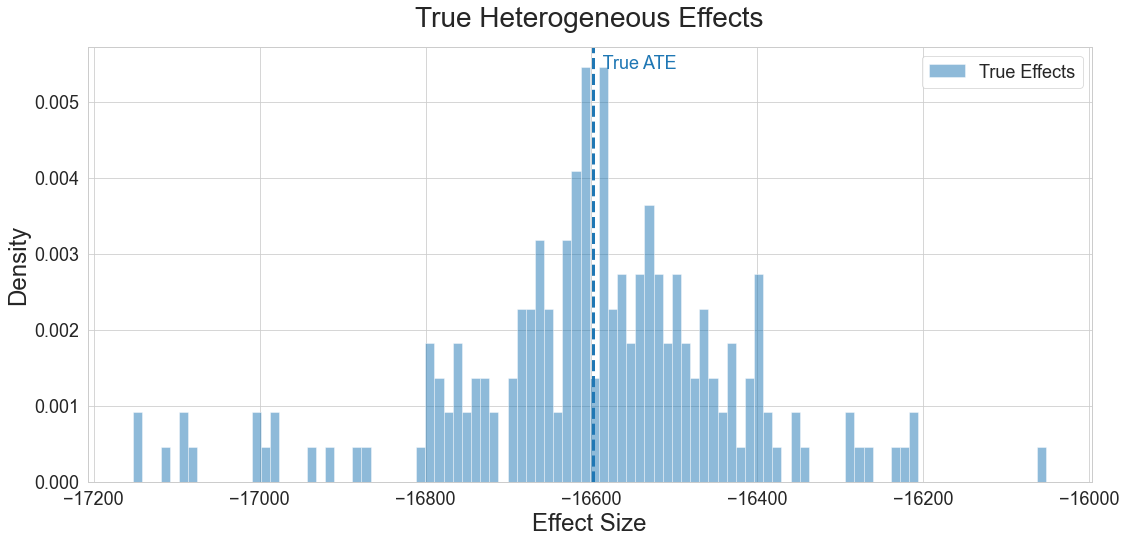

In [11]:
utils.effects_histogram(dataset.true_effects)

## Estimating heterogeneous treatment effects

We first install `whynot_estimators` and use the causal forest estimator to estimate individual effects.
This requires a working `R` installation. Beyond the causal forest, WhyNot provides a [collection of estimators](https://whynot-docs.readthedocs-hosted.com/en/latest/estimators.html#heterogeneous-treatment-effect-estimators) to estimate heterogeneous treatment effects. Each estimator returns an `InferenceResult` with the property `individual_effects`.

In [12]:
%%capture
!pip install whynot_estimators
!python -m whynot_estimators install causal_forest

In [13]:
import whynot_estimators

estimate = whynot_estimators.causal_forest.estimate_treatment_effect(
    dataset.covariates,
    dataset.treatments,
    dataset.outcomes
)

estimate.individual_effects[:10]

[-15941.486219482904,
 -14330.967818988955,
 -11848.275188371465,
 -17625.50355761607,
 -19361.02326593344,
 -19036.52508229865,
 -16304.745416711194,
 -16028.128736860208,
 -13687.381353571955,
 -14554.553278486259]

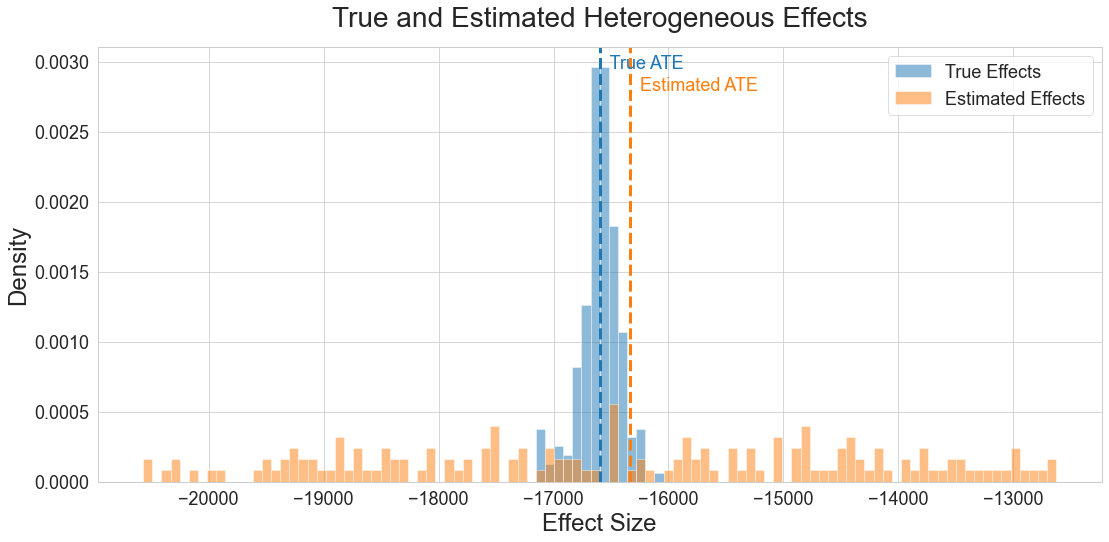

In [14]:
utils.effects_histogram(dataset.true_effects, estimate.individual_effects)

### Evaluating estimated HTEs

We can investigate the accuracy of the predicted heterogeneous treatment effects in various ways. Let the $n$-vector of true sample effects be denoted $\tau$ and the $n$-length vector of estimated sample effects be denoted $\hat{\tau}$.

First, we can take the "relative error" of the predictions:

$$\frac{||\hat{\tau} - \tau||_2}{||\tau||_2}$$

In [18]:
# Compute relative error for HTE estimates
relative_error = np.linalg.norm(estimate.individual_effects - dataset.true_effects) \
            / np.linalg.norm(dataset.true_effects)
print(f"relative_error: {relative_error:.2f}")

relative_error: 0.20


We can also look at these relative errors from simulator runs with different sample sizes. The shaded area around the plotted line is a 95% confidence interval bootstrapped from 20 iterations. Warning: This takes a while.

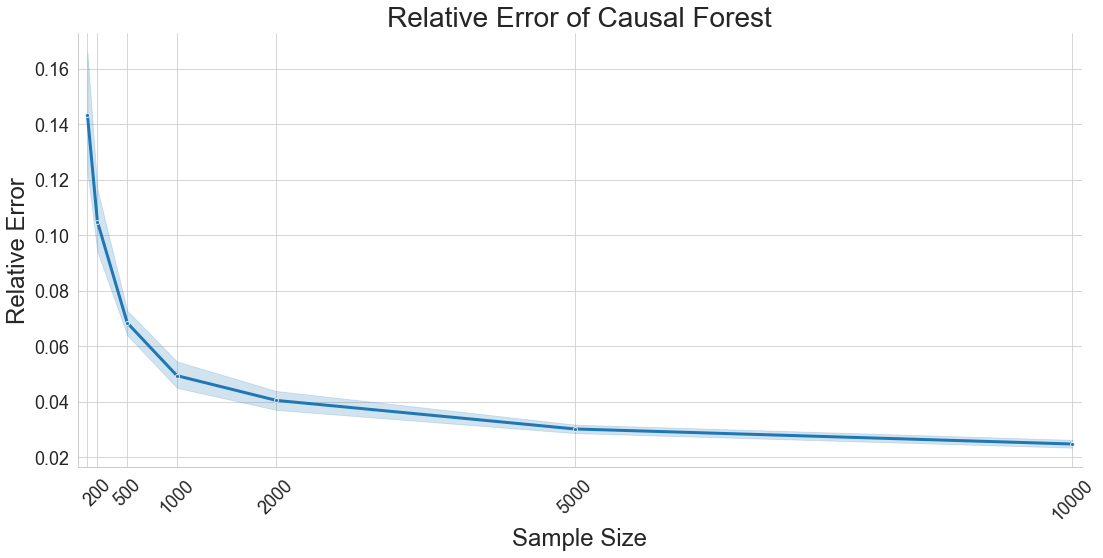

In [8]:
utils.generate_error_data()
utils.plot_relative_error()